In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk

In [44]:
data = pd.read_csv("nlp-getting-started/train.csv")
data.head(5)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [45]:
############### CREATING METAFEATURES ##################
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('english'))

data["mean_word_length"] = data["text"].apply(lambda x: np.mean([len(w) for w in str(x).lower().split()]))
data["tweet_length"] = data["text"].apply(lambda x: len(x))
data["word_count"] = data["text"].apply(lambda x: len(str(x).split()))
data["stopwords_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split(' ') if w in stopwords]))
data["punctuation_count"] = data["text"].apply(lambda x: len([p for p in str(x) if p in punctuation]))
data["url_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split()
                                                      if "http" in w or "https" in w or "www" in w or "url" in w]))
data["hashtag_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split() if "#" in w]))
data["@_count"] = data["text"].apply(lambda x: len([w for w in str(x).lower().split() if "@" in w]))

In [48]:
data.head(5)

,id,keyword,location,text,target,mean_word_length,tweet_length,word_count,stopwords_count,punctuation_count,url_count,hashtag_count,@_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,4.384615,69,13,6,1,0,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,4.571429,38,7,0,1,0,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,5.090909,133,22,11,3,0,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,7.125000,65,8,1,2,0,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,4.500000,88,16,7,2,0,2,0


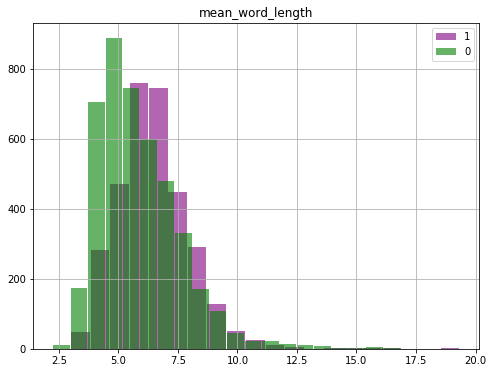

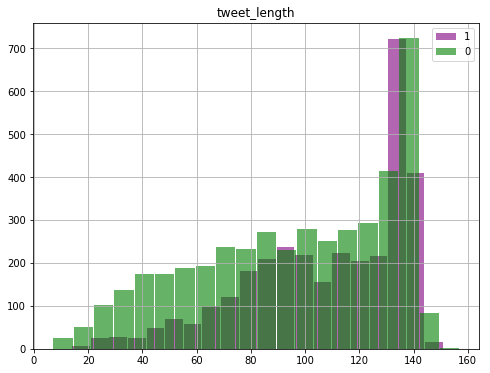

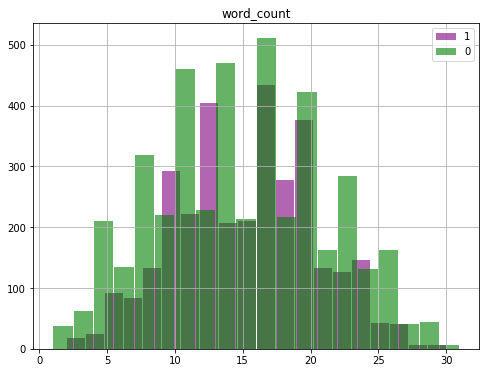

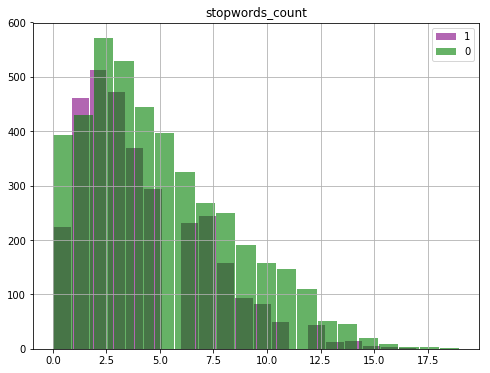

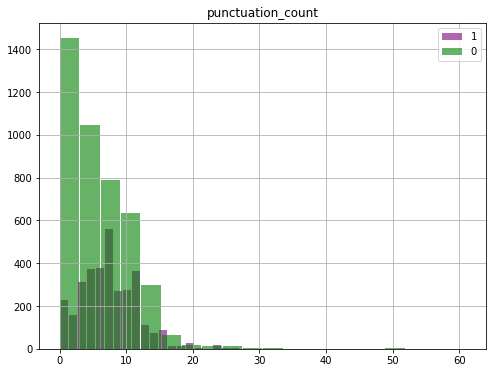

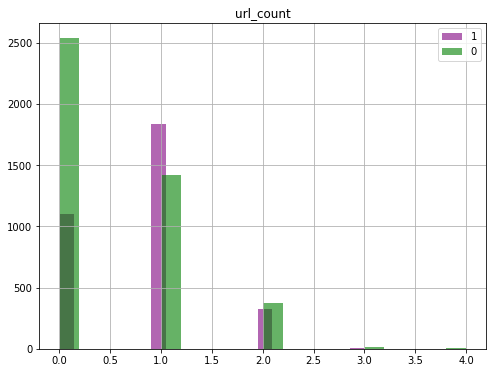

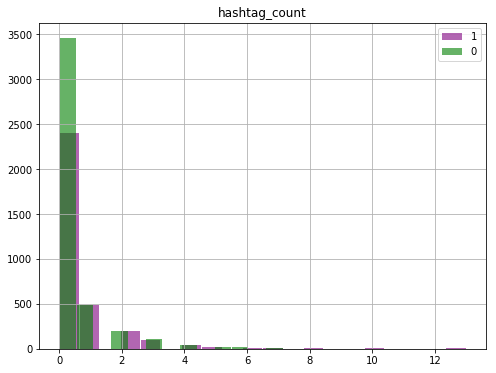

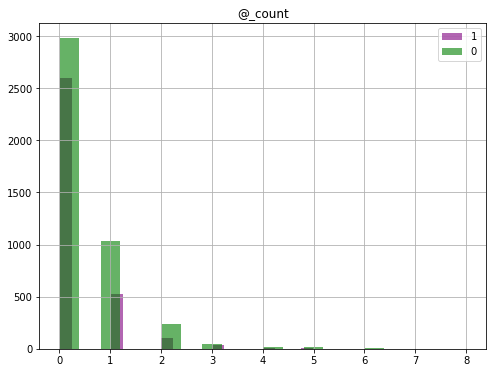

In [70]:
for column, row in data.items():
    if column not in ["id", "keyword", "location", "text", "target"]:
        plt.figure(figsize=[8,6])
        plt.title(column)
        data[column][data["target"]==1].hist(bins=20, color="purple", alpha=0.6, rwidth=0.95, label = "1")
        data[column][data["target"]==0].hist(bins=20, color="green", alpha=0.6, rwidth=0.95, label = "0")
        plt.legend()

In [71]:
from nltk.tokenize import word_tokenize

data["text"] = data["text"].str.lower()
data["tokens"] = data["text"].apply(nltk.word_tokenize)

data.head(5)

,id,keyword,location,text,target,mean_word_length,tweet_length,word_count,stopwords_count,punctuation_count,url_count,hashtag_count,@_count,tokens
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1,4.384615,69,13,6,1,0,1,0,"[our, deeds, are, the, reason, of, this, #, ea..."
1,4,NaN,NaN,forest fire near la ronge sask. canada,1,4.571429,38,7,0,1,0,0,0,"[forest, fire, near, la, ronge, sask, ., canada]"
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1,5.090909,133,22,11,3,0,0,0,"[all, residents, asked, to, 'shelter, in, plac..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,7.125000,65,8,1,2,0,1,0,"[13,000, people, receive, #, wildfires, evacua..."
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1,4.500000,88,16,7,2,0,2,0,"[just, got, sent, this, photo, from, ruby, #, ..."


In [72]:
from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

data["stemmed_tokens"] = data["tokens"].map(lambda y: [stemmer.stem(x) for x in y])

In [73]:
from nltk.corpus import stopwords
from string import punctuation

stopwords = set(stopwords.words('english'))
#print(stopwords)
punctuation = list(punctuation)
punctuation.append(['http', '....', '.....'])

data = data.drop(columns=["text", "tokens"])

for i, token in data["stemmed_tokens"].items():
    for word in token:
        while word in (stopwords and punctuation):
            try:
                token.remove(word)
            except:
                break


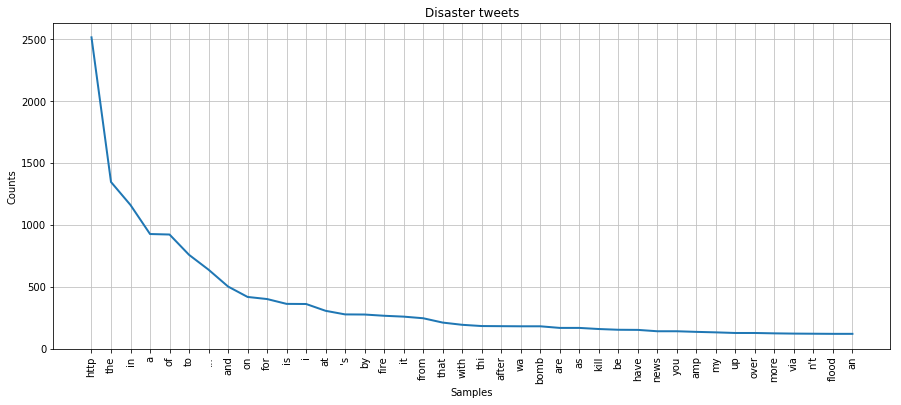

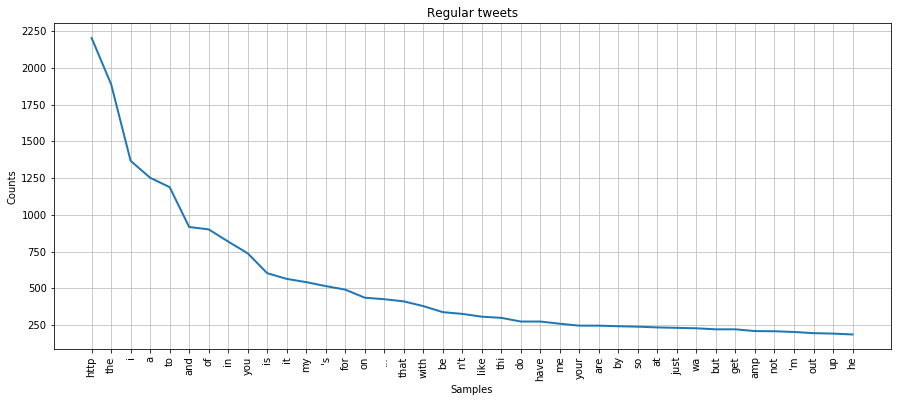

In [74]:
disaster_tweets = []
regular_tweets = []

for i, row in data.iterrows():
    if row["target"] == 1:
        disaster_tweets.append(row["stemmed_tokens"])
    else:
        regular_tweets.append(row["stemmed_tokens"])
        
disaster_tweets = [val for sublist in disaster_tweets for val in sublist]
regular_tweets = [val for sublist in regular_tweets for val in sublist]

freq_ds = nltk.FreqDist(disaster_tweets)
plt.figure(figsize=(15,6))
plt.title("Disaster tweets")
freq_ds.plot(40, cumulative=False)


freq_rg = nltk.FreqDist(regular_tweets)
plt.figure(figsize=(15,6))
plt.title("Regular tweets")
freq_rg.plot(40, cumulative=False)



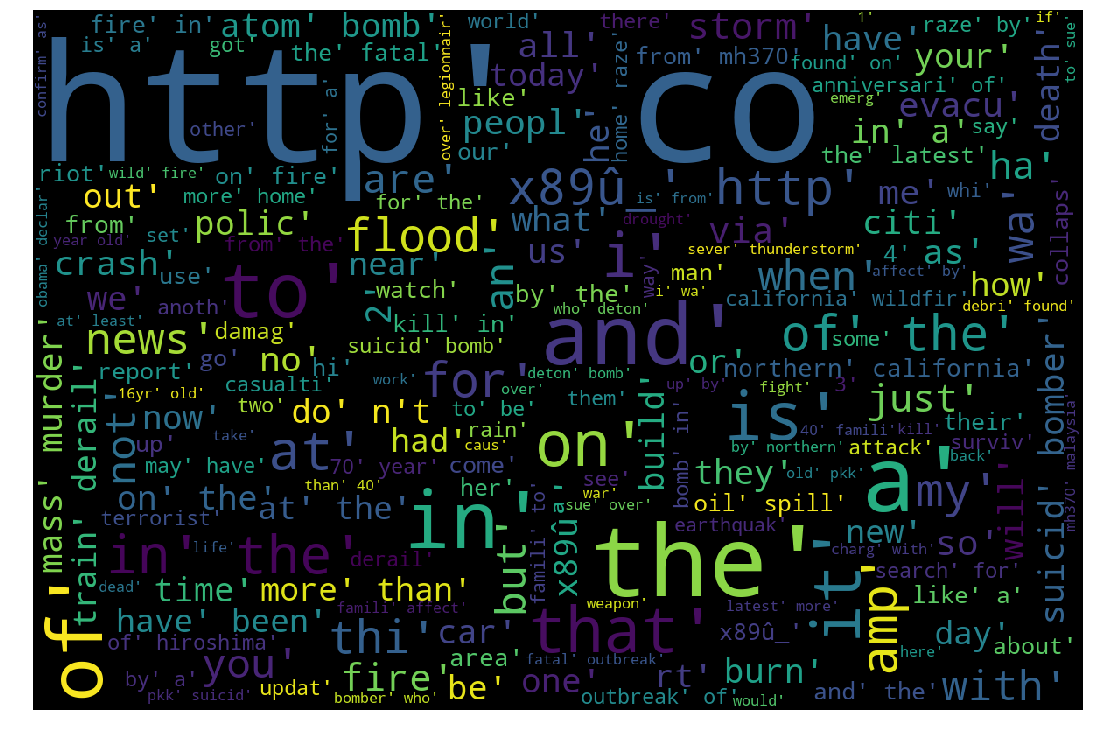

In [42]:
#print(disaster_tweets)

from wordcloud import WordCloud

wordcloud = WordCloud(width = 1200, height = 800, 
                background_color ='black',
                min_font_size = 10).generate(str(disaster_tweets)) 
  
# plot the WordCloud image                        
plt.figure(figsize = (15, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  